In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# S5. 

In [9]:
# # clinical
# clinical = pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/clinical.donors.02_28_19.tsv', 
#                           sep='\t', index_col=0)[['donor_sex', 'donor_age_at_diagnosis']]
# clinical.columns=['sex', 'age']
# clinical = clinical.append(pd.read_csv('/cellar/users/andreabc/Data/dbgap/clinical.all.txt', sep='\t', index_col=0)[['sex', 'age']])
# clinical = clinical.append(pd.read_csv('/nrnb/data/controlled/2019_dbGap_phs000452.v2.p1.c1_MelanomaGenomeSeq/cleaned_clinical/clinical.tsv', sep='\t', index_col='SUBJID', usecols=['SUBJID', 'sex', 'age']))
# clinical = clinical.append(pd.read_csv('/nrnb/data/controlled/2019_dbGap_phs001451.v1.p1.c1_PhaseIMelanomaVac/cleaned_clinical/clinical.tsv', sep='\t', index_col='SUBJID')[['sex', 'age']])
# clinical = clinical.append(pd.read_csv('/nrnb/data/controlled/2019_dbGap_phs001565.v1.p1.c1_GenCorrRespResICB_CancerMDS/cleaned_clinical/clinical.tsv', index_col='SUBJID', sep='\t', usecols=['sex', 'SUBJID', 'age']))
# clinical = clinical.append(pd.read_csv('/nrnb/data/controlled/2019_dbGap_phs001519.v1.p1.c1_GBMPhaseIVaccine/cleaned_clinical/clinical.tsv', index_col='SUBJID', sep='\t', usecols=['sex', 'SUBJID', 'age']))
# clinical = clinical.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/clinical.donor.THCA-SA.cleaned.tsv', index_col='SUBJID', sep='\t', usecols=['sex', 'SUBJID', 'age']))
# clinical = clinical.append(pd.read_csv('/nrnb/users/andreabc/Data/ICGC/clean_output/clinical.tsv', index_col='SUBJID', sep='\t', usecols=['sex', 'SUBJID', 'age']))

# clinical.head(2)

/cellar/users/andreabc/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,age,sex
DO51967,54.0,female
DO47068,48.0,male


#### A. Sex B. age distributions

In [2]:
mhc_df = pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/boxplot_data.MHC-I.tsv', sep='\t', index_col=0)
mhc_df = mhc_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/boxplot_data.MHC-II.tsv', sep='\t', index_col=0))

mhc_df.reset_index(inplace=True)
mhc_df = mhc_df.drop_duplicates(subset=['index']).set_index('index')
mhc_df.head(2)

,PHBR_score,age,age_categorical_3070,mutation_id,project_code,sex,tumor_type
index,,,,,,,
DO27765,0.985454,4.0,younger,M_TP53_S215R,NaN,male,MALY
DO27775,5.304091,4.0,younger,M_TP53_R273H,NaN,male,MALY


Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.valid.sex_age_counts.pdf


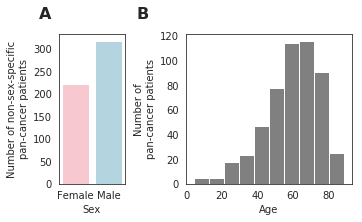

In [63]:
plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.2, 3]) 

# A - pancancer sex counts
plt.subplot(gs[0])
data = pd.DataFrame(mhc_df['sex'].value_counts()).T
ax = sns.barplot(data=data, order=['female', 'male'], palette=['pink', 'lightblue'])
plt.xlabel('Sex'), plt.ylabel('Number of non-sex-specific\npan-cancer patients')
plt.xticks([0,1], ['Female', 'Male'])
plt.text(-0.3, 1.1, 'A', transform=ax.transAxes, fontsize=16,  weight='bold')

# B - pancancer age distribution
age_df = mhc_df.dropna(subset=['age'])
fig = plt.subplot(gs[1])
plt.hist(x=age_df['age'].values, bins=10, color='grey')
plt.xlabel('Age')
plt.ylabel('Number of\npan-cancer patients')
# plt.yticks(range(0,1401,200))
plt.text(-0.3, 1.1, 'B', transform=fig.transAxes, fontsize=16,  weight='bold')

plt.tight_layout(pad=0.6, h_pad=1)

savepath = '/cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.valid.sex_age_counts.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')
plt.show()

#### C-D. Driver mutation counts

In [11]:
# load patients
mhcI = pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/boxplot_data.MHC-I.tsv', sep='\t', index_col=0)
mhcII = pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/boxplot_data.MHC-II.tsv', sep='\t', index_col=0)

In [8]:
# load binary driver matrix
binary_mut_df = pd.read_csv('/cellar/users/andreabc/Data/dbgap/driver_mut.binary_matrix', sep='\t', index_col=0)
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.ICGC.CLLE-ES.matrix', sep='\t', index_col=0))
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.ICGC.THCA-SA.matrix', sep='\t', index_col=0))
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.ICGC.matrix', sep='\t', index_col=0))
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.phs000452.v2.p1.c1_MelanomaGenomeSeq.matrix', sep='\t', index_col=0))
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.phs001451.v1.p1.c1_PhaseIMelanomaVac.matrix', sep='\t', index_col=0))
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.phs001519.v1.p1.c1_GBMPhaseIVaccine.matrix', sep='\t', index_col=0))
binary_mut_df = binary_mut_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/binary_driver_mut.phs001565.v1.p1.c1_GenCorrRespResICB_CancerMDS.matrix', sep='\t', index_col=0))

In [13]:
# subset mutation matrix
binary_mut_I_df = binary_mut_df[binary_mut_df.index.isin(mhcI.index)]
binary_mut_II_df = binary_mut_df[binary_mut_df.index.isin(mhcII.index)]

In [17]:
female_I = binary_mut_I_df[binary_mut_I_df.index.isin(mhcI[mhcI['sex']=='female'].index)].sum(axis=1).mean()
male_I = binary_mut_I_df[binary_mut_I_df.index.isin(mhcI[mhcI['sex']=='male'].index)].sum(axis=1).mean()

female_II = binary_mut_II_df[binary_mut_II_df.index.isin(mhcII[mhcII['sex']=='female'].index)].sum(axis=1).mean()
male_II = binary_mut_II_df[binary_mut_II_df.index.isin(mhcII[mhcII['sex']=='male'].index)].sum(axis=1).mean()

younger_I = binary_mut_I_df[binary_mut_I_df.index.isin(mhcI[mhcI['age_categorical_3070']=='younger'].index)].sum(axis=1).mean()
older_I = binary_mut_I_df[binary_mut_I_df.index.isin(mhcI[mhcI['age_categorical_3070']=='older'].index)].sum(axis=1).mean()

younger_II = binary_mut_II_df[binary_mut_II_df.index.isin(mhcII[mhcII['age_categorical_3070']=='younger'].index)].sum(axis=1).mean()
older_II = binary_mut_II_df[binary_mut_II_df.index.isin(mhcII[mhcII['age_categorical_3070']=='older'].index)].sum(axis=1).mean()

In [65]:
data = pd.DataFrame({'count': [female_I, male_I, female_II, male_II, younger_I, older_I, younger_II, older_II],
                     'class': ['I', 'I', 'II', 'II', 'I', 'I', 'II', 'II'],
                     'category': ['Female', 'Male', 'Female', 'Male', 'Younger', 'Older', 'Younger', 'Older']})
data

,count,class,category
0,1.251799,I,Female
1,1.333333,I,Male
2,1.196850,II,Female
3,1.326087,II,Male
4,1.259259,I,Younger
5,1.323944,I,Older
6,1.212963,II,Younger
7,1.300000,II,Older


Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.validation.driver_counts.pdf


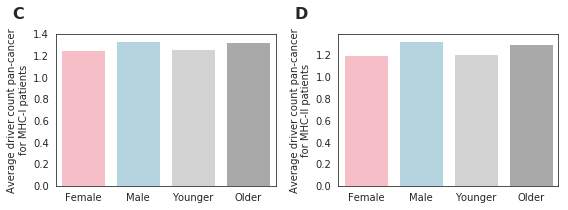

In [81]:
# A. MHC-I
plt.figure(figsize=(8,2.75))
plt.subplot(1,2,1)
ax = sns.barplot(x='category', y='count', data=data[data['class']=='I'], 
            palette=['lightpink', 'lightblue', 'lightgrey', 'darkgrey'])
plt.xlabel(''), plt.ylabel('Average driver count pan-cancer\nfor MHC-I patients')
plt.text(-0.2, 1.1, 'C', transform=ax.transAxes, fontsize=16,  weight='bold')

# B. MHC-II
plt.subplot(1,2,2)
ax = sns.barplot(x='category', y='count', data=data[data['class']=='II'], 
            palette=['lightpink', 'lightblue', 'lightgrey', 'darkgrey'])
plt.xlabel(''), plt.ylabel('Average driver count pan-cancer\nfor MHC-II patients')
plt.text(-0.2, 1.1, 'D', transform=ax.transAxes, fontsize=16,  weight='bold')

plt.tight_layout()
savepath = '/cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.validation.driver_counts.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')
plt.show()

#### E-H. PHBR distribution

In [41]:
from scipy.stats import mannwhitneyu, ks_2samp

In [33]:
# load affinity dataframes
affinity_I_df = pd.read_csv('/cellar/users/andreabc/Data/dbgap/driver_mut.class_i.dbgap.affinities', sep='\t', index_col=0)
affinity_I_df = affinity_I_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_i.ICGC.affinities', sep='\t', index_col=0))
affinity_I_df = affinity_I_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_i.ICGC.THCA-SA.affinities', sep='\t', index_col=0))
affinity_I_df = affinity_I_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_i.phs000452.v2.p1.c1_MelanomaGenomeSeq.affinities', sep='\t', index_col=0))
affinity_I_df = affinity_I_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_i.phs001451.v1.p1.c1_PhaseIMelanomaVac.affinities', sep='\t', index_col=0))
affinity_I_df = affinity_I_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_i.phs001519.v1.p1.c1_GBMPhaseIVaccine.affinities', sep='\t', index_col=0))
affinity_I_df = affinity_I_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_i.phs001565.v1.p1.c1_GenCorrRespResICB_CancerMDS.affinities', sep='\t', index_col=0))
affinity_I_df = affinity_I_df[affinity_I_df.index.isin(mhcI.index)]

affinity_II_df = pd.read_csv('/cellar/users/andreabc/Data/dbgap/driver_mut.class_ii.dbgap.affinities', sep='\t', index_col=0)
affinity_II_df = affinity_II_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_ii.ICGC.affinities', sep='\t', index_col=0))
affinity_II_df = affinity_II_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_ii.ICGC.THCA-SA.affinities', sep='\t', index_col=0))
affinity_II_df = affinity_II_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_ii.phs000452.v2.p1.c1_MelanomaGenomeSeq.affinities', sep='\t', index_col=0))
affinity_II_df = affinity_II_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_ii.phs001451.v1.p1.c1_PhaseIMelanomaVac.affinities', sep='\t', index_col=0))
affinity_II_df = affinity_II_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_ii.phs001519.v1.p1.c1_GBMPhaseIVaccine.affinities', sep='\t', index_col=0))
affinity_II_df = affinity_II_df.append(pd.read_csv('/cellar/users/andreabc/Data/hla_sex/validation/clean_data/driver_mut.class_ii.phs001565.v1.p1.c1_GenCorrRespResICB_CancerMDS.affinities', sep='\t', index_col=0))
affinity_II_df = affinity_II_df[affinity_II_df.index.isin(mhcII.index)]

Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.validation.sex_age_PHBR.violin.pdf


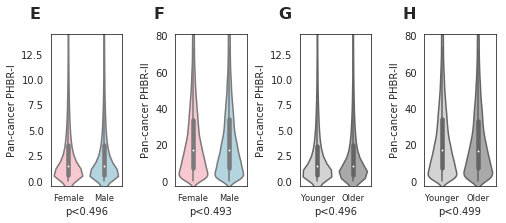

In [48]:
plt.figure(figsize=(7,5))

# A - All PHBR-I scores - sex
plt.subplot(2,4,1)
data = affinity_I_df.join(mhcI[['sex']]).reset_index()
data = pd.melt(data, id_vars=['sex', 'index']).drop_duplicates()
p = mannwhitneyu(data[data['sex']=='female'].index.values, data[data['sex']=='male'].index.values).pvalue
ax = sns.violinplot(x='sex', y='value', data=data, order=['female', 'male'], palette=['pink', 'lightblue'])
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pan-cancer PHBR-I')
plt.xticks([0,1], ['Female', 'Male'], fontsize='small')
plt.ylim(ymin=-0.5, ymax=14.5)
plt.text(-0.3, 1.1, 'E', transform=ax.transAxes, fontsize=16,  weight='bold')


# B - All PHBR-II scores - sex
plt.subplot(2,4,2)
data = affinity_II_df.join(mhcII[['sex']]).reset_index()
data = pd.melt(data, id_vars=['sex', 'index']).drop_duplicates()
p = mannwhitneyu(data[data['sex']=='female'].index.values, data[data['sex']=='male'].index.values).pvalue
ax = sns.violinplot(x='sex', y='value', data=data, order=['female', 'male'], palette=['pink', 'lightblue'])
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pan-cancer PHBR-II')
plt.xticks([0,1], ['Female', 'Male'], fontsize='small')
plt.ylim(ymin=-2.7,ymax=81)
plt.text(-0.3, 1.1, 'F', transform=ax.transAxes, fontsize=16,  weight='bold')


# C - All PHBR-I scores - age
plt.subplot(2,4,3)
data = affinity_I_df.join(mhcI[['age_categorical_3070']]).reset_index()
data = pd.melt(data, id_vars=['age_categorical_3070', 'index']).drop_duplicates()
p = mannwhitneyu(data[data['age_categorical_3070']=='younger'].index.values, data[data['age_categorical_3070']=='older'].index.values).pvalue
ax = sns.violinplot(x='age_categorical_3070', y='value', data=data, order=['younger', 'older'], palette=['lightgrey', 'darkgrey'])
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pan-cancer PHBR-I')
plt.xticks([0,1], ['Younger', 'Older'], fontsize='small')
plt.ylim(ymin=-0.5, ymax=14.5)
plt.text(-0.3, 1.1, 'G', transform=ax.transAxes, fontsize=16,  weight='bold')


# D - All PHBR-II scores - age
plt.subplot(2,4,4)
data = affinity_II_df.join(mhcII[['age_categorical_3070']]).reset_index()
data = pd.melt(data, id_vars=['age_categorical_3070', 'index']).drop_duplicates()
p = mannwhitneyu(data[data['age_categorical_3070']=='younger'].index.values, data[data['age_categorical_3070']=='older'].index.values).pvalue
ax = sns.violinplot(x='age_categorical_3070', y='value', data=data, order=['younger', 'older'], palette=['lightgrey', 'darkgrey'])
plt.xlabel('p<{:.3}'.format(p)), plt.ylabel('Pan-cancer PHBR-II')
plt.xticks([0,1], ['Younger', 'Older'], fontsize='small')
plt.ylim(ymin=-2.7,ymax=81)
plt.text(-0.3, 1.1, 'H', transform=ax.transAxes, fontsize=16,  weight='bold')

plt.tight_layout(pad=0.6, h_pad=1)

savepath = '/cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.validation.sex_age_PHBR.violin.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath, bbox_inches='tight')
plt.show()

In [43]:
# mhcI 
thresholds_I = range(0,21,1)
f_medians_list_I, m_medians_list_I = [],[]
y_medians_list_I, o_medians_list_I = [],[]

for threshold in thresholds_I:
    # sex
    data = pd.DataFrame((affinity_I_df < threshold).sum(axis=1) / len(affinity_I_df.columns), columns=['fraction'])
    data = data.join(mhcI[['sex']])
    
    f_medians_list_I.append(data[data['sex']=='female'].fraction.median())
    m_medians_list_I.append(data[data['sex']=='male'].fraction.median())
    
    # age
    data = pd.DataFrame((affinity_I_df < threshold).sum(axis=1) / len(affinity_I_df.columns), columns=['fraction'])
    data = data.join(mhcI[['age_categorical_3070']])
    
    y_medians_list_I.append(data[data['age_categorical_3070']=='younger'].fraction.median())
    o_medians_list_I.append(data[data['age_categorical_3070']=='older'].fraction.median())

In [44]:
# mhcII
thresholds_II = range(0,81,1)
f_medians_list_II, m_medians_list_II = [],[]
y_medians_list_II, o_medians_list_II = [],[]

for threshold in thresholds_II:
    # sex
    data = pd.DataFrame((affinity_II_df < threshold).sum(axis=1) / len(affinity_II_df.columns), columns=['fraction'])
    data = data.join(mhcII[['sex']])
    
    f_medians_list_II.append(data[data['sex']=='female'].fraction.median())
    m_medians_list_II.append(data[data['sex']=='male'].fraction.median())
    
    # age
    data = pd.DataFrame((affinity_II_df < threshold).sum(axis=1) / len(affinity_II_df.columns), columns=['fraction'])
    data = data.join(mhcII[['age_categorical_3070']])
    
    y_medians_list_II.append(data[data['age_categorical_3070']=='younger'].fraction.median())
    o_medians_list_II.append(data[data['age_categorical_3070']=='older'].fraction.median())

Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.validation.fraction_ECDF.pdf


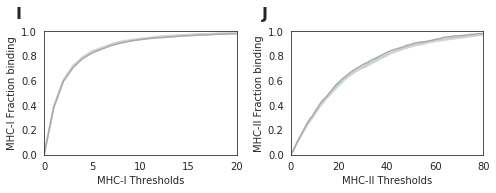

In [46]:
plt.figure(figsize=(7,2.5))

# A - All PHBR-I scores - sex
fig = plt.subplot(1,2,1)
# p = ks_2samp(f_medians_list_I, m_medians_list_I).pvalue

plt.plot(thresholds_I, f_medians_list_I, color='lightpink')
plt.plot(thresholds_I, m_medians_list_I, color='lightblue')
plt.plot(thresholds_I, y_medians_list_I, color='lightgrey')
plt.plot(thresholds_I, o_medians_list_I, color='darkgrey')
plt.text(-0.15, 1.1, 'I', transform=fig.transAxes, fontsize=16,  weight='bold')
plt.xlabel('MHC-I Thresholds'), plt.ylabel('MHC-I Fraction binding')
plt.ylim(0,1), plt.xlim(0,20)


# plt.title('Median fraction of binding driver mutations')
# plt.xlabel('KS 2-sample test: p<{:.3}'.format(p)), plt.ylabel('Fraction of binding driver muts')


# B - All PHBR-II scores - sex
fig = plt.subplot(1,2,2)
p = ks_2samp(f_medians_list_II, m_medians_list_II).pvalue

plt.plot(thresholds_II, f_medians_list_II, color='lightpink')
plt.plot(thresholds_II, m_medians_list_II, color='lightblue')
plt.plot(thresholds_II, y_medians_list_II, color='lightgrey')
plt.plot(thresholds_II, o_medians_list_II, color='darkgrey')
plt.text(-0.15, 1.1, 'J', transform=fig.transAxes, fontsize=16,  weight='bold')
plt.xlabel('MHC-II Thresholds'), plt.ylabel('MHC-II Fraction binding')
plt.ylim(0,1), plt.xlim(0,80)

plt.tight_layout()
savepath = '/cellar/users/andreabc/Data/hla_sex/figures/supplementary/S5.validation.fraction_ECDF.pdf'
print('Saving to {}'.format(savepath)), plt.savefig(savepath, bbox_inches="tight")
plt.show()

#### Look at sex/disease - skew?

In [4]:
disease_dict = {'MELA': 'Melanoma'}


Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/valid.disease_by_sex.pdf


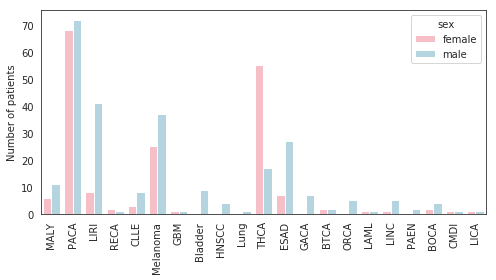

In [5]:
plt.figure(figsize=(7,4))
temp_df = mhc_df.reset_index().drop_duplicates(subset=['index']).set_index('index')
temp_df['tumor_type'] = temp_df['tumor_type'].replace({'MELA': 'Melanoma'})
sns.countplot(x='tumor_type', hue='sex', data=temp_df, hue_order=['female','male'], palette=['lightpink', 'lightblue'])
plt.xticks(rotation=90), plt.xlabel(''), plt.ylabel('Number of patients')

plt.tight_layout()
savepath = '/cellar/users/andreabc/Data/hla_sex/figures/supplementary/valid.disease_by_sex.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath)
plt.show()

#### Look at sex/age - skew?

Saving to /cellar/users/andreabc/Data/hla_sex/figures/supplementary/valid.age_by_sex.pdf


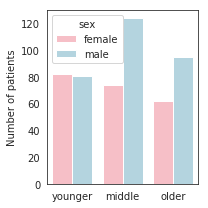

In [28]:
plt.figure(figsize=(3,3))
temp_df = mhc_df.reset_index().drop_duplicates(subset=['index']).set_index('index')
# temp_df['tumor_type'] = temp_df['tumor_type'].replace({'MELA': 'Melanoma'})
sns.countplot(x='age_categorical_3070', hue='sex', data=temp_df, hue_order=['female','male'], palette=['lightpink', 'lightblue'])
# plt.xticks(rotation=90, ha='right'), 
plt.xlabel(''), plt.ylabel('Number of patients')

plt.tight_layout()
savepath = '/cellar/users/andreabc/Data/hla_sex/figures/supplementary/valid.age_by_sex.pdf'
print('Saving to {}'.format(savepath))
plt.savefig(savepath)
plt.show()